In [1]:
{}
import os
import numpy as np
import pprint
import pickle
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

from pathlib import Path
from collections import deque

In [2]:
# read in the matrices to inspect

p = Path('.').resolve().parent / 'lasso_and_n4sid' / 'n4sid_v1'

if p.exists():
    a_matrix = np.load(p / 'matrix_A1.npy')
    b_matrix = np.load(p / 'matrix_B1.npy')
    c_matrix = np.load(p / 'matrix_C1.npy')
    d_matrix = np.load(p / 'matrix_D1.npy')


In [3]:
print(a_matrix)
print(a_matrix.shape)
print(b_matrix)
print(b_matrix.shape)
print(c_matrix)
print(d_matrix)

[[ 0.98154062  0.00392863  0.01305596  0.00994301 -0.00620773 -0.03393096
   0.01451968  0.00945787]
 [ 0.20462503  0.88923136  0.03718339  0.00138765  0.10304766 -0.23615481
  -0.0292271   0.10253744]
 [ 0.84337744 -0.25996913  0.81063378  0.08407197  0.41340258  0.17511514
  -0.18206814  0.07113234]
 [-1.13376645  0.43389347  0.09257787  0.79322779  0.10973279  0.24918882
   0.03100918  0.02343908]
 [ 0.9180556  -0.39322804 -0.38310123 -0.19692349  0.77337838  0.26735187
  -0.06651764 -0.00315444]
 [-0.04663159  0.20924382  0.2769302   0.45830949 -0.06402696  0.43991173
  -0.40245776 -0.25000864]
 [ 0.56880797 -0.12315229 -0.17101381  0.04237984 -0.01335673  0.26500754
   0.43938171  0.12977529]
 [-0.50665319  0.6132963   0.11002295  0.51078421  0.28707335 -0.2386131
  -0.34388066 -0.44998195]]
(8, 8)
[[ 1.06739218e-06  3.10049417e-07  8.64458389e-07  2.65407124e-06
   1.88540480e-05 -1.84875570e-04  1.20371572e-04 -2.13067533e-05
   1.05997270e-05 -1.57168952e-03 -2.30996442e-08 -9.

In [18]:
# Version 3

p = Path('.').resolve().parent / 'lasso_and_n4sid' / 'n4sid_v3'

if p.exists():
    a_matrix = np.load(p / 'matrix_AK1.npy')
    b_matrix = np.load(p / 'matrix_BK1.npy')
    c_matrix = np.load(p / 'matrix_C1.npy')
    d_matrix = np.load(p / 'matrix_D1.npy')
    
display(a_matrix)
display(b_matrix)
_x = np.array([5, 5, 5])
_u = np.array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

print(a_matrix.shape)
print(_x.shape)
    
print(b_matrix.shape)
print(_u.shape)

x_next = a_matrix @ _x + b_matrix @ _u
y_modeled = c_matrix @ _x + d_matrix @ _u

print(f"x_next is {x_next}")
print(f"y_modeled is {y_modeled}")



array([[-0.58772656, -0.05484999, -0.03070292],
       [-1.25653591, -0.15766376, -0.0704444 ],
       [ 1.44156839, -0.54128782, -0.13929845]])

array([[-2.76733146e-04, -4.00729107e-04, -3.75813866e-03,
         1.03071702e-06, -3.56493033e-08,  7.21066236e-08,
         1.04989708e-06,  1.67032337e-07,  5.42159590e-05,
         3.24855873e-04],
       [ 3.48147623e-04, -7.79597632e-04, -3.34187839e-03,
        -2.17535687e-06, -9.64016812e-09,  3.88379219e-10,
        -3.85899108e-07,  1.11176457e-07,  2.11183010e-03,
        -2.85055526e-04],
       [-3.64584550e-03,  1.10863789e-04,  7.41396884e-03,
        -1.44607323e-05,  2.62378883e-08, -1.52882841e-07,
        -4.94227931e-06,  1.68469233e-06,  3.47484698e-04,
         4.17967736e-03]])

(3, 3)
(3,)
(3, 10)
(10,)
x_next is [-5.28432860e+24  8.94920932e+24 -6.51324280e+24]
y_modeled is [3.94810848e+27]


       Type                Name
       ----                ----
      _tvp:             TDryBul
      _tvp:             HGloHor
      _tvp:     occupancy_ratio
      _tvp:     TSetpoint_Lower
      _tvp:     TSetpoint_Upper
      _tvp:            ElecCost
        _u:       heating_power
        _u:       cooling_power
        _u:     t_heat_setpoint
        _u:     t_cool_setpoint
        _x:            t_indoor
        _x:          t_indoor_1
        _x:          t_indoor_2
      _aux:         total_power
      _aux:                cost


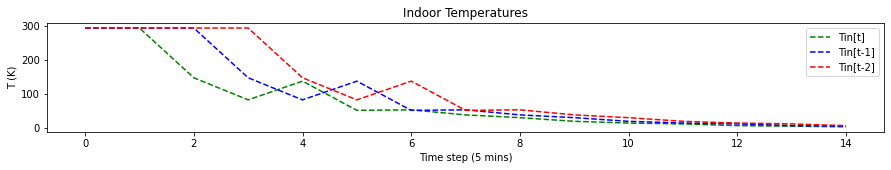

In [20]:
# parse some of the results!
# -- 003 is the statefeedback. 
results_file = Path('.').resolve() / 'results' / 'som3_mpc_stateestimator.pkl'
if p.exists():
    with open(results_file, 'rb') as f:
        results = pickle.load(f)

variables = results['mpc'].result_queries
print(f"{'Type':>11}{'Name':>20}")
print(f"{'----':>11}{'----':>20}")
for v in variables['ind']:
    if len(v) > 2:
        continue
    print(f"{v[0]:>10}:{v[1]:>20}")
    
    
# display(results['mpc'].data_fields)
# display(results['mpc']['_x'].__class__)

# TODO -- deal with time
# print(results['mpc']['_time'])

max_t = 15
fig, ax = plt.subplots(figsize=(15, 2))
plt.plot(results['mpc']['_x', 't_indoor'][:max_t], 'g--', label="Tin[t]")
plt.plot(results['mpc']['_x', 't_indoor_1'][:max_t], 'b--', label="Tin[t-1]")
plt.plot(results['mpc']['_x', 't_indoor_2'][:max_t], 'r--', label="Tin[t-2]")
# plt.plot(results['mpc']['_tvp', 'TSetpoint_Upper'][:max_t], label="TUpper")
# plt.plot(results['mpc']['_tvp', 'TSetpoint_Lower'][:max_t], label="Tlower")

# plt.plot(index, row['EMA26'], marker='o', markersize=5, color="darkred")
# plt.axvline(x=index, linewidth=2, color='r')

plt.title('Indoor Temperatures')
plt.xlabel('Time step (5 mins)')
plt.ylabel('T (K)')
plt.legend()

# test the y_meas calculation


# display(results['mpc'].keys())

# dir(results['mpc'].result_queries)

The x_matrix init: [-0.8194 -0.029  -0.006 ]


Text(0.5, 0, 'Time step (5 mins)')

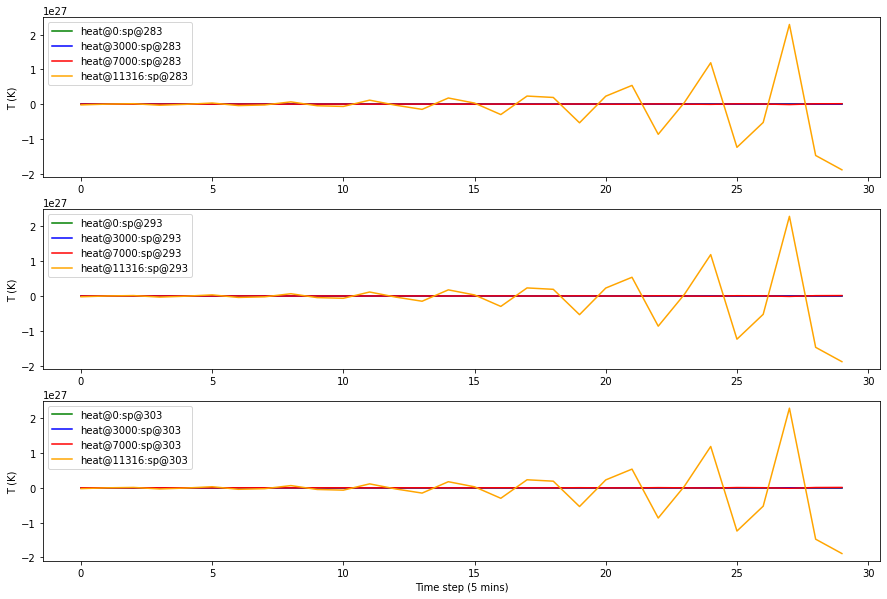

In [13]:
## Test if the temperature increases with the x's and u's given in the MPC

# construct the x and u matrix
t_init = 0
# _x = results['mpc']['_x', 'x'][t_init]s
_x = np.array([-0.8194, -0.029, -0.006])
print(f"The x_matrix init: {_x}")

sims = {}

t_heat_setpoint_range = [283, 293, 303]
heating_range = [0, 3000, 7000, 11316]
for t_heat_setpoint in t_heat_setpoint_range:
    for heat in heating_range:
        index = f"{t_heat_setpoint}_{heat}"
        sims[index] = {}
        sims[index]["temperature"] = []
        temps = deque([293, 293, 293])

        t_cool_setpoint = 298
        # var to store results

        for t in range(0,30):

        #     _u = np.array([
        #         results['mpc']['_tvp', 'TDryBul'][t][0],
        #         results['mpc']['_tvp', 'HGloHor'][t][0],
        #         results['mpc']['_tvp', 'occupancy_ratio'][t][0],
        #         results['mpc']['_u', 't_heat_setpoint'][t][0] - results['mpc']['_x', 't_indoor'][t][0],
        #         results['mpc']['_x', 't_indoor'][t][0] - results['mpc']['_u', 't_cool_setpoint'][t][0],
        #         results['mpc']['_tvp', 'TDryBul'][t][0] - results['mpc']['_x', 't_indoor_1'][t][0],
        #         results['mpc']['_u', 'heating_power'][t][0],
        #         results['mpc']['_u', 'cooling_power'][t][0],
        #         results['mpc']['_x', 't_indoor_1'][t][0],
        #         results['mpc']['_x', 't_indoor_1'][t][0] - results['mpc']['_x', 't_indoor_2'][t][0],
        #     ])

            t_indoor = temps.popleft()
            t_indoor_1 = temps[0]
            t_indoor_2 = temps[1]

            # force some of these variables as fixed
            _u = np.array([
                273, # freezing outside
                0,  # no sun
                t_indoor_1, # previous value of the temperature
                t_heat_setpoint - t_indoor, # heating term
                11316,  # full heating power
                0,      # no cooling
                t_indoor - t_cool_setpoint, #cooling term 
                5,  # full occupancy
                t_indoor_1 - t_indoor_2, #delta of temperatures 
                273 - t_indoor_1 #infiltration term 
            ])


        #     print(_u)
        #     display(_x)
        #     print(a_matrix.shape)
        #     print(_x.shape)

        #     print(b_matrix.shape)
        #     print(_u.shape)
            x_next = a_matrix @ _x + b_matrix @ _u
            y_modeled = c_matrix @ _x + d_matrix @ _u
        #     display(x_next)
        #     display(y_modeled)
            _x = x_next

            temps.append(y_modeled[0])        
            sims[index]["temperature"].append(y_modeled[0])

        #     print(temps)
#             print(f"Indoor air temperature do-mpc: {results['mpc']['_x', 't_indoor'][t][0]:.2f}, y_modeled: {y_modeled[0]:.2f}. H_sp: {t_heat_setpoint} C_sp: {t_cool_setpoint} ")


fig = plt.figure(figsize=(15, 10))
colors = ['green', 'blue', 'red', 'orange']
for i_1, t_heating_setpoint in enumerate(t_heat_setpoint_range):
    fig.add_subplot(len(t_heat_setpoint_range), 1, i_1+1)

    for i_2, heat in enumerate(heating_range):
        index = f"{t_heat_setpoint}_{heat}"
        plt.plot(sims[index]["temperature"], colors[i_2], label=f"heat@{heat}:sp@{t_heating_setpoint}")

    plt.ylabel('T (K)')
    plt.legend()
#     plt.title('Indoor Temperatures')

plt.xlabel('Time step (5 mins)')



In [23]:
# Version 4

p = Path('.').resolve().parent / 'lasso_and_n4sid' / 'n4sid_v4'

if p.exists():
    a_matrix = np.load(p / 'matrix_AK1.npy')
    b_matrix = np.load(p / 'matrix_BK1.npy')
    c_matrix = np.load(p / 'matrix_C1.npy')
    d_matrix = np.load(p / 'matrix_D1.npy')
    
display(a_matrix)
display(b_matrix)

# Test with random data
_x = np.array([-0.2])
_u = np.array([271.92, 
               0, 
               0,  # t_heat - t_in
               0,  # t_in - t_cool,
               273 - 293,])

print(a_matrix.shape)
print(_x.shape)
print(b_matrix.shape)
print(_u.shape)

x_next = a_matrix @ _x + b_matrix @ _u
y_modeled = c_matrix @ _x + d_matrix @ _u

print(f"x_next is {x_next}")
print(f"y_modeled is {y_modeled}")




array([[0.87619072]])

array([[-9.35528725e-05,  1.80072462e-06, -5.55892401e-06,
        -2.75942462e-06,  8.15130221e-05]])

(1, 1)
(1,)
(1, 5)
(5,)
x_next is [-0.2023073]
y_modeled is [268.07129334]


The x_matrix init: [-0.22307945]


Text(0.5, 0, 'Time step (5 mins)')

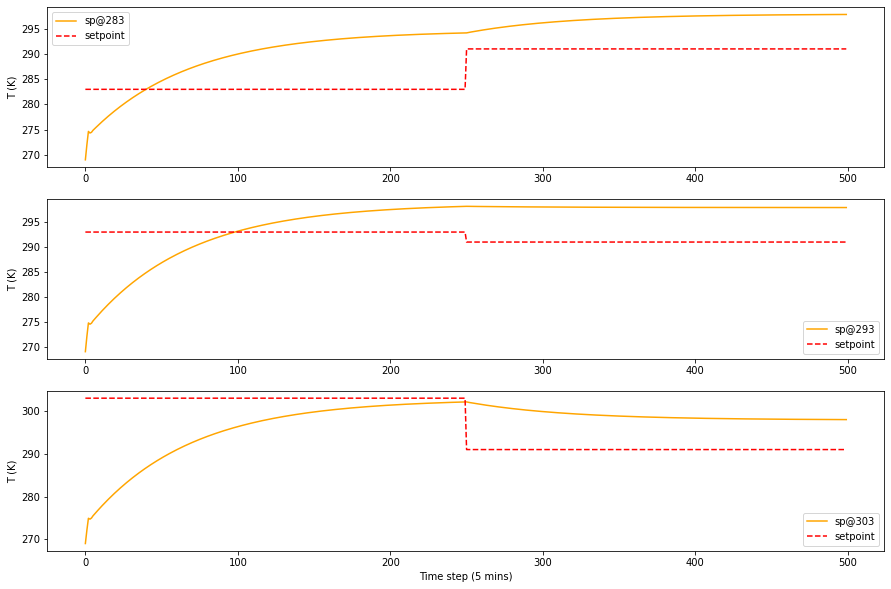

In [41]:
## Test if the temperature increases with the x's and u's given in the MPC

# construct the x and u matrix
t_init = 0
# _x = results['mpc']['_x', 'x'][t_init]

print(f"The x_matrix init: {_x}")

sims = {}

t_heat_setpoint_range = [283, 293, 303]
for t_heat_setpoint in t_heat_setpoint_range:
    _x = np.array([-0.200731])
    temps = deque([293, 293, 293])
    t_cool_setpoint = 303

    index = f"{t_heat_setpoint}"
    sims[index] = {}
    sims[index]["temperature"] = []
    sims[index]["heat_setpoint"] = []
    
    # var to store results

    for t in range(0,500):

    #     _u = np.array([
    #         results['mpc']['_tvp', 'TDryBul'][t][0],
    #         results['mpc']['_tvp', 'HGloHor'][t][0],
    #         results['mpc']['_tvp', 'occupancy_ratio'][t][0],
    #         results['mpc']['_u', 't_heat_setpoint'][t][0] - results['mpc']['_x', 't_indoor'][t][0],
    #         results['mpc']['_x', 't_indoor'][t][0] - results['mpc']['_u', 't_cool_setpoint'][t][0],
    #         results['mpc']['_tvp', 'TDryBul'][t][0] - results['mpc']['_x', 't_indoor_1'][t][0],
    #         results['mpc']['_u', 'heating_power'][t][0],
    #         results['mpc']['_u', 'cooling_power'][t][0],
    #         results['mpc']['_x', 't_indoor_1'][t][0],
    #         results['mpc']['_x', 't_indoor_1'][t][0] - results['mpc']['_x', 't_indoor_2'][t][0],
    #     ])

        t_indoor = temps.popleft()
        t_indoor_1 = temps[0]
        t_indoor_2 = temps[1]

        if t >= 250:
            t_heat_setpoint = 291
            
        # force some of these variables as fixed
        _u = np.array([
            273, #Outside Air Temperature 
            0, # GLobal Horizontal Irradiance  
            t_heat_setpoint - t_indoor, # heating term,
            t_indoor - t_cool_setpoint, #cooling term 
            273 - t_indoor_1   #infiltration term 
        ])

    #     print(_u)
    #     display(_x)
    #     print(a_matrix.shape)
    #     print(_x.shape)

    #     print(b_matrix.shape)
    #     print(_u.shape)
        x_next = a_matrix @ _x + b_matrix @ _u
        y_modeled = c_matrix @ _x + d_matrix @ _u
    #     display(x_next)
    #     display(y_modeled)
        _x = x_next

        temps.append(y_modeled[0])        
        sims[index]["temperature"].append(y_modeled[0])
        sims[index]["heat_setpoint"].append(t_heat_setpoint)

    #     print(temps)
#             print(f"Indoor air temperature do-mpc: {results['mpc']['_x', 't_indoor'][t][0]:.2f}, y_modeled: {y_modeled[0]:.2f}. H_sp: {t_heat_setpoint} C_sp: {t_cool_setpoint} ")


fig = plt.figure(figsize=(15, 10))
colors = ['green', 'blue', 'red', 'orange']
for i_1, t_heat_setpoint in enumerate(t_heat_setpoint_range):
    fig.add_subplot(len(t_heat_setpoint_range), 1, i_1+1)
    index = f"{t_heat_setpoint}"
    plt.plot(sims[index]["temperature"], colors[i_2], label=f"sp@{t_heat_setpoint}")
    plt.plot(sims[index]["heat_setpoint"], 'r--', label="setpoint")

    plt.ylabel('T (K)')
    plt.legend()
#     plt.title('Indoor Temperatures')

plt.xlabel('Time step (5 mins)')

Text(0.5, 0, 'Time step (5 mins)')

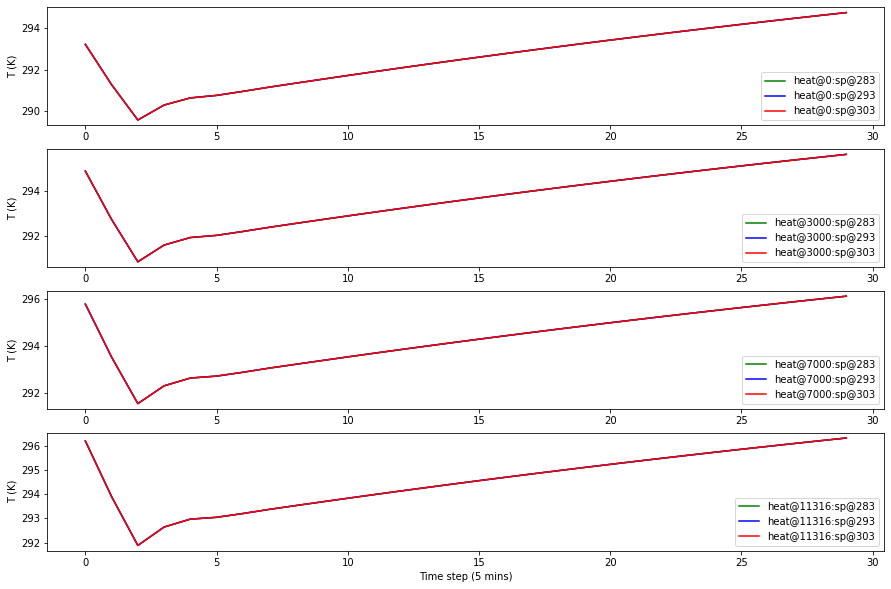

In [14]:
# plot the setpoints with differeting heats
fig = plt.figure(figsize=(15, 10))
for i_1, heat in enumerate(heating_range):
    fig.add_subplot(len(heating_range), 1, i_1+1)

    for i_2, t_heating_setpoint in enumerate(t_heat_setpoint_range):
        index = f"{t_heat_setpoint}_{heat}"
        plt.plot(sims[index]["temperature"], colors[i_2], label=f"heat@{heat}:sp@{t_heating_setpoint}")
    
    plt.ylabel('T (K)')
    plt.legend()
plt.xlabel('Time step (5 mins)')



In [3]:
# Version 5

p = Path('.').resolve().parent / 'lasso_and_n4sid' / 'n4sid_v5'

if p.exists():
    a_matrix = np.load(p / 'matrix_A1.npy')
    b_matrix = np.load(p / 'matrix_B1.npy')
    c_matrix = np.load(p / 'matrix_C1.npy')
    d_matrix = np.load(p / 'matrix_D1.npy')
    
display(a_matrix)
display(b_matrix)

# Test with random data
_x = np.array((
            [2.46448],[-2.80786],[0.435631],[0.754336],[-3.03051],[-3.59742],[10.7656]
            ))
_u = np.array([273, # T_OA (K)  - freezing outside
               0,  # Horizontal Global Irradiance (W) 
               0,  # No occupants [ 0 - 6]
               1000,  # Internal gains convective flow (W), ?  [ 0 - 3000]
               13000, # Heating Power (W), [0 - 6000]
               500,  # Fan Power (W), ? [0 - 500]
               0.175,    # OA Volumetric flow rate (m3/s), [0.01 - 0.175]  # full outside ai
              ])

print(a_matrix.shape)
print(b_matrix.shape)
print(c_matrix.shape)
print(d_matrix.shape)

x_next = a_matrix @ _x + b_matrix @ _u
y_modeled = c_matrix @ _x + d_matrix @ _u

print(f"x_next is {x_next}")
print(f"y_modeled is {y_modeled[0][0]}")





array([[-1.34196821e+00,  5.84342014e-02,  8.64388369e-02,
         8.85810059e-03,  6.79758427e-03,  4.79967436e-03,
         1.27848963e-03],
       [-8.38247473e+00,  1.11198102e-01,  1.93752232e+00,
         6.22713272e-02,  1.33373050e-01,  6.70627382e-02,
         2.52798880e-02],
       [-5.38352885e+00,  5.76956003e-01,  5.42877295e-01,
         3.09308525e-03,  6.22443596e-04,  2.34148816e-02,
        -2.78096188e-03],
       [ 1.58094830e+00, -1.40172880e-01,  5.81406149e-02,
         7.44876313e-01, -3.11268571e-01, -1.87503872e-01,
         2.68489975e-02],
       [-1.58771923e+00, -2.00131843e+00,  3.05789767e+00,
         2.18445622e-01,  2.11326289e-01,  4.93556167e-01,
         8.78216905e-03],
       [ 5.61015247e-01,  9.00907652e-01, -1.40429056e+00,
        -2.12663274e-01, -5.43267140e-02,  2.46566729e-01,
         3.08817560e-01],
       [ 4.47788509e+01,  3.49935945e-01, -3.83867273e+00,
        -3.26516174e-01, -1.03975133e-01, -8.93032048e-01,
        -4.9987382

array([[ 1.99470455e-02,  1.06557385e-04,  8.00146879e-05,
        -5.02915041e-07, -2.51215615e-07, -5.56115136e-07,
         7.94102930e-03],
       [ 7.26160508e-02, -4.14222217e-03,  1.24354894e-03,
        -5.99216984e-06, -2.38241818e-06, -9.08784005e-06,
         9.16660523e-02],
       [ 4.53617945e-02,  2.06533332e-03, -8.01009354e-05,
         3.58198107e-07,  4.17202935e-07, -4.01052811e-06,
         1.21736014e-02],
       [-1.33434621e-02, -4.22728579e-04, -1.60383412e-03,
        -8.73537992e-06, -1.11194537e-05, -2.03650949e-05,
         3.30043086e-01],
       [ 1.57929645e-02, -8.30702217e-03,  2.45278847e-03,
        -1.07965553e-05, -9.47254684e-06,  3.10008990e-05,
        -5.71785157e-03],
       [-5.78506664e-03,  3.78414744e-03, -3.39550710e-03,
         8.38649859e-08, -1.13676452e-05,  4.61777221e-05,
        -3.28033499e-02],
       [-3.83020431e-01,  4.07966298e-03, -2.17535562e-03,
         7.87585169e-06,  7.36414959e-07,  3.92075552e-05,
        -2.1529114

(7, 7)
(7, 7)
(1, 7)
(1, 7)
x_next is [[   1.991792     16.34762157    8.93858252   -7.19957277    0.74094514
    -5.16076477 -108.01629505]
 [ -15.01005344   -0.65422387   -8.06326291  -24.2014182   -16.2609003
   -22.16261021 -125.01814049]
 [  -9.32195535    5.03387423   -2.37516482  -18.51332011  -10.5728022
   -16.47451211 -119.3300424 ]
 [  12.22678075   26.58261032   19.17357128    3.03541599   10.97593389
     5.07422398  -97.7813063 ]
 [   6.32489248   20.68072206   13.27168301   -2.86647228    5.07404562
    -0.82766428 -103.68319457]
 [   6.12594244   20.48177202   13.07273297   -3.06542232    4.87509559
    -1.02661432 -103.88214461]
 [ 111.04461731  125.40044689  117.99140784  101.85325255  109.79377046
   103.89206055    1.03653026]]
y_modeled is 417.59578249779565


The x_matrix init: [[-4.69363392e+00 -1.67318539e+01 -1.05089656e+01  2.94214338e+00
  -3.69988531e+00  1.23280065e+00  8.74647407e+01]
 [-1.47444823e+02 -5.22632074e+02 -3.28687425e+02  9.05344047e+01
  -1.16473317e+02  3.72604487e+01  2.72479437e+03]
 [-9.97123940e+01 -3.45678688e+02 -2.18531920e+02  5.63026853e+01
  -7.94080083e+01  2.13771981e+01  1.78327811e+03]
 [-1.98677301e+00 -1.44516785e+01 -8.00822470e+00  5.91964857e+00
  -9.57801745e-01  4.14971949e+00  9.34380846e+01]
 [ 2.39078095e+01  7.34748731e+01  4.78522894e+01 -7.53230873e+00
   1.98160750e+01 -4.94133636e-01 -3.55551947e+02]
 [ 3.65505235e+01  1.10782053e+02  7.24097262e+01 -1.05341312e+01
   3.04227506e+01  6.22501731e-03 -5.31727607e+02]
 [ 7.48163318e+01  3.69841089e+02  2.17334647e+02 -1.12316263e+02
   5.04621963e+01 -7.04248185e+01 -2.18374034e+03]]


Text(0.5, 0, 'Time step (5 mins)')

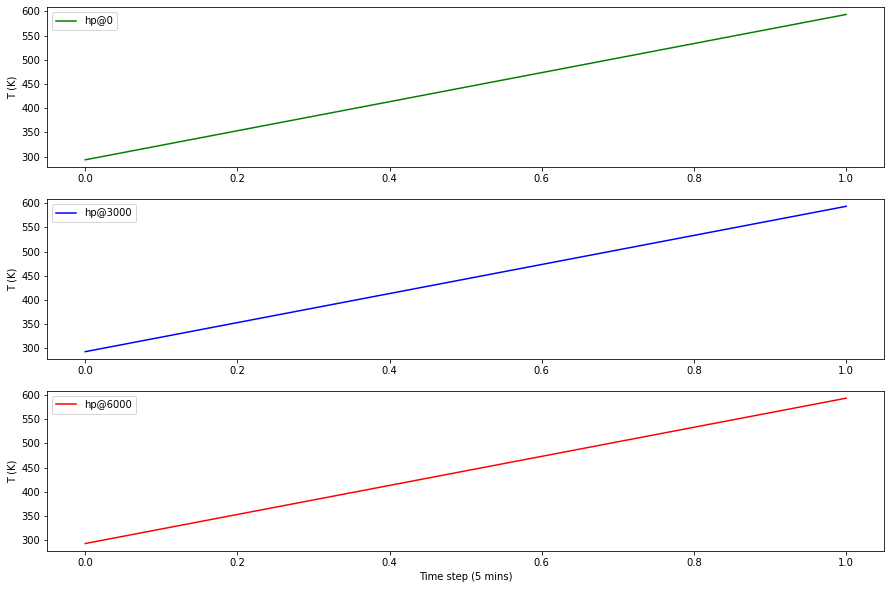

In [11]:
## Test if the temperature increases with the x's and u's given in the MPC

# construct the x and u matrix
t_init = 0
# _x = results['mpc']['_x', 'x'][t_init]

print(f"The x_matrix init: {_x}")

sims = {}

heating_power_range = [0, 3000, 6000]
for heating_power in heating_power_range:
    _x = np.array((
#             [2.46448], [-2.80786], [0.435631], [0.754336], [-3.03051], [-3.59742], [10.7656]
            [2.32145], [-0.334731], [0.0517163], [-0.0580721], [0.0264939], [-0.0292909], [0.00496072]
            ))

    index = f"{heating_power}"
    sims[index] = {}
    sims[index]["temperature"] = []
    
    # var to store results

    for t in range(0,2):

    #     _u = np.array([
    #         results['mpc']['_tvp', 'TDryBul'][t][0],
    #         results['mpc']['_tvp', 'HGloHor'][t][0],
    #         results['mpc']['_tvp', 'occupancy_ratio'][t][0],
    #         results['mpc']['_u', 't_heat_setpoint'][t][0] - results['mpc']['_x', 't_indoor'][t][0],
    #         results['mpc']['_x', 't_indoor'][t][0] - results['mpc']['_u', 't_cool_setpoint'][t][0],
    #         results['mpc']['_tvp', 'TDryBul'][t][0] - results['mpc']['_x', 't_indoor_1'][t][0],
    #         results['mpc']['_u', 'heating_power'][t][0],
    #         results['mpc']['_u', 'cooling_power'][t][0],
    #         results['mpc']['_x', 't_indoor_1'][t][0],
    #         results['mpc']['_x', 't_indoor_1'][t][0] - results['mpc']['_x', 't_indoor_2'][t][0],
    #     ])
            
        _u = np.array([273, # T_OA (K)  - freezing outside
               0,  # Horizontal Global Irradiance (W) 
               0,  # No occupants [ 0 - 6]
               1000,  # Internal gains convective flow (W), ?  [ 0 - 3000]
               heating_power, # Heating Power (W), [0 - 6000]
               500,  # Fan Power (W), ? [0 - 500]
               0.175,    # OA Volumetric flow rate (m3/s), [0.01 - 0.175]  # full outside air
              ])

        x_next = a_matrix @ _x + b_matrix @ _u
        y_modeled = c_matrix @ _x + d_matrix @ _u
        _x = x_next

#         temps.append(y_modeled[0][0])        
#         print(temps)xit
        
        sims[index]["temperature"].append(y_modeled[0][0])

        # print(f"Indoor air temperature do-mpc: {results['mpc']['_x', 't_indoor'][t][0]:.2f}, y_modeled: {y_modeled[0]:.2f}. H_sp: {t_heat_setpoint} C_sp: {t_cool_setpoint} ")


fig = plt.figure(figsize=(15, 10))
colors = ['green', 'blue', 'red', 'orange']
for i_1, heating_power in enumerate(heating_power_range):
    fig.add_subplot(len(heating_power_range), 1, i_1+1)
    index = f"{heating_power}"
    plt.plot(sims[index]["temperature"], colors[i_1], label=f"hp@{heating_power}")
#     plt.plot(sims[index]["heat_setpoint"], 'r--', label="setpoint")

    plt.ylabel('T (K)')
    plt.legend()
#     plt.title('Indoor Temperatures')

plt.xlabel('Time step (5 mins)')

In [38]:
_x = np.array((
#             [2.46448], [-2.80786], [0.435631], [0.754336], [-3.03051], [-3.59742], [10.7656]
            [2.32145], [-0.334731], [0.0517163], [-0.0580721], [0.0264939], [-0.0292909], [0.00496072]
            ))
y_modeled = c_matrix @ _x + d_matrix @ _u
y_modeled

display(a_matrix)
display(a_matrix.shape)
display(_x)
display(_x.shape)
display(c_matrix)
display(c_matrix.shape)

array([[-1.34196821e+00,  5.84342014e-02,  8.64388369e-02,
         8.85810059e-03,  6.79758427e-03,  4.79967436e-03,
         1.27848963e-03],
       [-8.38247473e+00,  1.11198102e-01,  1.93752232e+00,
         6.22713272e-02,  1.33373050e-01,  6.70627382e-02,
         2.52798880e-02],
       [-5.38352885e+00,  5.76956003e-01,  5.42877295e-01,
         3.09308525e-03,  6.22443596e-04,  2.34148816e-02,
        -2.78096188e-03],
       [ 1.58094830e+00, -1.40172880e-01,  5.81406149e-02,
         7.44876313e-01, -3.11268571e-01, -1.87503872e-01,
         2.68489975e-02],
       [-1.58771923e+00, -2.00131843e+00,  3.05789767e+00,
         2.18445622e-01,  2.11326289e-01,  4.93556167e-01,
         8.78216905e-03],
       [ 5.61015247e-01,  9.00907652e-01, -1.40429056e+00,
        -2.12663274e-01, -5.43267140e-02,  2.46566729e-01,
         3.08817560e-01],
       [ 4.47788509e+01,  3.49935945e-01, -3.83867273e+00,
        -3.26516174e-01, -1.03975133e-01, -8.93032048e-01,
        -4.9987382

(7, 7)

array([[ 2.32145   ],
       [-0.334731  ],
       [ 0.0517163 ],
       [-0.0580721 ],
       [ 0.0264939 ],
       [-0.0292909 ],
       [ 0.00496072]])

(7, 1)

array([[124.70229961, -14.24403009, -31.79415958, -12.37886234,
        -14.62824336, -10.98975534,   0.89142792]])

(1, 7)

In [42]:
display(y_modeled)

_x_2 = a_matrix @ _x
t_next = c_matrix @ _x_2
display(t_next)

_x_3 = a_matrix @ _x_2
t_next_2 = c_matrix @ _x_3
display(t_next_2)

_x_4 = a_matrix @ _x_3
t_next_3 = c_matrix @ _x_4
display(t_next_3)

np.zeros([2,2])


array([[293.27142484]])

array([[367.30951517]])

array([[-322.76849197]])

array([[809.79666854]])

array([[0., 0.],
       [0., 0.]])

In [54]:
# Version 5 results

# parse some of the results!
# -- 003 is the statefeedback. 
results_file = Path('.').resolve() / 'results' / 'som3_mpc_stateestimator_v5.pkl'
if p.exists():
    with open(results_file, 'rb') as f:
        results = pickle.load(f)

variables = results['mpc'].result_queries
print(f"{'Type':>11}{'Name':>20}")
print(f"{'----':>11}{'----':>20}")
for v in variables['ind']:
    if len(v) > 2:
        continue
    print(f"{v[0]:>10}:{v[1]:>20}")
    
    
# display(results['mpc'].data_fields)
display(results['mpc']['_x', 't_indoor'][3])
out = results['mpc'].prediction(('_u','heating_power'), t_ind=3)
display(out.shape)
display(out)

# TODO -- deal with time
# print(results['mpc']['_time'])

# max_t = 15
# fig, ax = plt.subplots(figsize=(15, 2))
# plt.plot(results['mpc']['_x', 't_indoor'][:max_t], 'g--', label="Tin[t]")
# plt.plot(results['mpc']['_x', 't_indoor_1'][:max_t], 'b--', label="Tin[t-1]")
# plt.plot(results['mpc']['_x', 't_indoor_2'][:max_t], 'r--', label="Tin[t-2]")
# # plt.plot(results['mpc']['_tvp', 'TSetpoint_Upper'][:max_t], label="TUpper")
# # plt.plot(results['mpc']['_tvp', 'TSetpoint_Lower'][:max_t], label="Tlower")

# # plt.plot(index, row['EMA26'], marker='o', markersize=5, color="darkred")
# # plt.axvline(x=index, linewidth=2, color='r')

# plt.title('Indoor Temperatures')
# plt.xlabel('Time step (5 mins)')
# plt.ylabel('T (K)')
# plt.legend()

# test the y_meas calculation


# display(results['mpc'].keys())

# dir(results['mpc'].result_queries)

       Type                Name
       ----                ----
      _tvp:             TDryBul
      _tvp:             HGloHor
      _tvp:     occupancy_ratio
      _tvp:     TSetpoint_Lower
      _tvp:     TSetpoint_Upper
      _tvp:            ElecCost
        _x:                   x
        _u:       heating_power
        _u:           fan_power
        _x:            t_indoor
      _aux:         total_power
      _aux:                cost


array([-278.24220721])

(1, 30, 1)

array([[[6.00000000e+03],
        [5.23184080e-07],
        [2.17890973e-04],
        [1.97382555e+01],
        [3.88365512e-06],
        [1.68848460e+01],
        [1.65984279e+01],
        [1.60381478e+01],
        [1.60449213e+01],
        [1.60122457e+01],
        [1.60420748e+01],
        [1.60196408e+01],
        [1.60416609e+01],
        [1.60286568e+01],
        [1.60402706e+01],
        [1.60333481e+01],
        [1.60400144e+01],
        [1.60369990e+01],
        [1.60406172e+01],
        [1.60402704e+01],
        [1.60418860e+01],
        [1.60436833e+01],
        [1.60438972e+01],
        [1.60463649e+01],
        [1.60467173e+01],
        [1.60513302e+01],
        [1.60479487e+01],
        [1.60552870e+01],
        [1.60682914e+01],
        [1.61103333e+01]]])